Importando bibliotecas iniciais

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

Lendo o dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vamos verificar algumas informações sobre o dataset e procurar por valores nulos

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
np.sum(dataset.isnull())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Nenhum valor nulo. Demos sorte!

Vamos visualizar a distribuição das minhas amostras entre as duas classes de target.

In [5]:
dataset['Class'].value_counts(True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

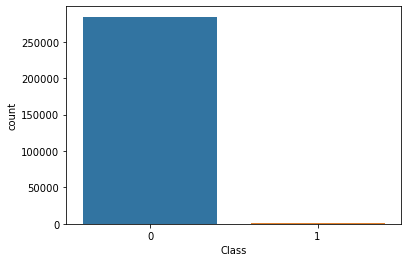

In [6]:
sns.countplot(dataset['Class'])

Perceba que o número de indivíduos na classe 1 (ou seja, que efetivamente ativaram o serviço de seguro) corresponde a menos do que 1% do meu dataset.

Agora, precisamos corrigir a diferença entre o número de indivíduos em cada classe. Do contrário, nosso modelo irá entregar uma falsa acurácia alta. Imagine que 90% de nossas amostras fossem da classe 0, um modelo que chutasse que todos são da classe 0 teria 90% de acurácia, mas não estaria fazendo nenhuma previsão sobre os meus dados. Por isso, precisamos trabalhar sobre um dataset dividido entre as duas classes. Verifique o que aconteceria do contrário:

In [7]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Time','Class'], axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.9990519995786665


In [11]:
cm

array([[56832,    32],
       [   22,    76]], dtype=int64)

Nosso modelo teve uma acurácia de 99.9%! Parece perfeito... mas o que deveríamos estar interessados em calcular é o recall de nosso modelo {acrescentar explicação sobre recall depois}, que é de apenas vergonhosos 0.13%

Vamos agora criar um novo dataset, com um número de amostras igual em ambas as classes da target

In [12]:
target_1 = dataset[dataset['Class'] == 1]
target_0 = dataset[dataset['Class'] == 0]
target_0_aux = target_0.sample(n=target_1.shape[0], random_state=42)
target_1_aux = target_1.copy()
reduced_dataset = pd.concat([target_0_aux, target_1_aux])
reduced_dataset = reduced_dataset.sample(frac=1).reset_index(drop=True)
reduced_dataset['Class'].value_counts(True)

1    0.5
0    0.5
Name: Class, dtype: float64

In [13]:
reduced_dataset.shape

(984, 31)

Agora vamos visualizar o dataset reduzido

In [14]:
reduced_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,99108.0,-1.193558,1.603153,1.460880,2.892423,0.539453,0.949329,-0.152326,0.533829,0.162927,...,0.178522,0.492015,-0.150269,0.397025,-0.424748,-0.110939,-0.389285,0.135586,4.95,0
1,152058.0,-3.576362,3.299436,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363,...,0.540731,0.719526,0.379249,-0.616962,-0.442811,0.359841,-2.651825,0.422184,1.00,1
2,36081.0,1.306817,-0.541898,0.166026,-0.632248,-0.698127,-0.418271,-0.424042,-0.036891,-1.062217,...,0.250819,0.764577,-0.132648,0.281172,0.660827,-0.066862,0.003071,-0.005665,20.00,0
3,147501.0,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27,1
4,8878.0,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,63099.0,1.439755,-1.132433,0.689558,-1.566143,-1.380795,0.192639,-1.402329,0.132131,-1.928539,...,0.003005,0.457738,-0.029303,-0.286978,0.302777,-0.072964,0.068430,0.011431,10.40,0
980,34687.0,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1
981,149558.0,2.058386,-0.062857,-1.096334,0.392694,-0.080459,-1.089400,0.166785,-0.303121,0.548885,...,-0.288329,-0.690630,0.338556,-0.084520,-0.304949,0.205521,-0.067826,-0.061269,1.79,0
982,171621.0,-10.979719,9.441250,-7.679816,-3.091572,-2.606832,-1.688433,-1.565577,3.600139,5.232322,...,-0.689142,0.222755,0.493056,0.094231,1.497581,-0.029859,0.657312,-0.707135,1.46,0


Vamos agora montar um modelo Random Forest para vermos como o nosso dataset se comporta agora

In [36]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X = reduced_dataset.iloc[:, 0:30]
y = reduced_dataset.iloc[:, 30]

In [37]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,99108.0,-1.193558,1.603153,1.460880,2.892423,0.539453,0.949329,-0.152326,0.533829,0.162927,...,-0.360092,0.178522,0.492015,-0.150269,0.397025,-0.424748,-0.110939,-0.389285,0.135586,4.95
1,152058.0,-3.576362,3.299436,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363,...,-0.181455,0.540731,0.719526,0.379249,-0.616962,-0.442811,0.359841,-2.651825,0.422184,1.00
2,36081.0,1.306817,-0.541898,0.166026,-0.632248,-0.698127,-0.418271,-0.424042,-0.036891,-1.062217,...,0.047930,0.250819,0.764577,-0.132648,0.281172,0.660827,-0.066862,0.003071,-0.005665,20.00
3,147501.0,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,...,2.425677,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27
4,8878.0,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,63099.0,1.439755,-1.132433,0.689558,-1.566143,-1.380795,0.192639,-1.402329,0.132131,-1.928539,...,-0.294127,0.003005,0.457738,-0.029303,-0.286978,0.302777,-0.072964,0.068430,0.011431,10.40
980,34687.0,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02
981,149558.0,2.058386,-0.062857,-1.096334,0.392694,-0.080459,-1.089400,0.166785,-0.303121,0.548885,...,-0.230123,-0.288329,-0.690630,0.338556,-0.084520,-0.304949,0.205521,-0.067826,-0.061269,1.79
982,171621.0,-10.979719,9.441250,-7.679816,-3.091572,-2.606832,-1.688433,-1.565577,3.600139,5.232322,...,3.660069,-0.689142,0.222755,0.493056,0.094231,1.497581,-0.029859,0.657312,-0.707135,1.46


In [38]:
y

0      0
1      1
2      0
3      1
4      1
      ..
979    0
980    1
981    0
982    0
983    0
Name: Class, Length: 984, dtype: int64

In [53]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
model = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_leaf_nodes = 16, random_state = RANDOM_SEED)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Com o modelo feito podemos tentar fazer as previsões.

In [47]:
y_pred = model.predict(X_test)

Agora compararemos via confusion matrix os resultados da previsão.

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Dos verdadeiros negativos acertamos: {0}".format(cm[0][0]))
print("Dos falsos positivos erramos: {0}".format(cm[0][1]))
print("Dos falsos negativos erramos: {0}".format(cm[1][0]))
print("Dos verdadeiros positivos acertamos: {0}".format(cm[1][1]))
print("Porcentagem de erro: {0}%".format((cm[0][1] + cm[1][0]) / len(y_pred) * 100))
print("Porcentagem de acerto: {0}%".format((cm[0][0] + cm[1][1]) / len(y_pred) * 100))

Dos verdadeiros negativos acertamos: 96
Dos falsos positivos erramos: 1
Dos falsos negativos erramos: 9
Dos verdadeiros positivos acertamos: 91
Porcentagem de erro: 5.0761421319796955%
Porcentagem de acerto: 94.9238578680203%


Portanto, erramos aproximadamente 5% das classificações, isso é ótimo, não?

Vamos ver também nossa accuracy_score e nosso recall_score.

In [56]:
from sklearn.metrics import recall_score

print("Nosso f1_score é de: {0}%".format(accuracy_score(y_test, y_pred) * 100))
print("Nosso recall_score é de: {0}%".format(recall_score(y_test, y_pred) * 100))

Nosso f1_score é de: 94.9238578680203%
Nosso recall_score é de: 91.0%


Muito melhor do que os 0.13% de antes!

No entanto, nós escolhemos argumentos arbitrários para o classificador Random Forest que, por sua vez, talvez não esteja no seu potencial máximo e uma troca de parametros poderiam aumentar nossa acurácia e diminuir nossos falsos negativos e falsos positivos.
Para isso, vamos usar o RandomSearchCV do sklearn, ele randomiza os parametros em busca da melhor acurácia possível do modelo usando um dicionário de hiperparametros predefinidos e validação por cruzamento.

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#Preparando os hiperparametros
n_estimators = []
for i in range(1, 510, 50):
    n_estimators.append(i)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt']
max_depth = []
for i in range(1, 60, 10):
    max_depth.append(i)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 3, 5, 7, 9]
bootstrap = [True, False]

hyper = {'n_estimators': n_estimators,
             'criterion': criterion,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}

In [103]:
randomforest = RandomForestClassifier()
rscv = RandomizedSearchCV(randomforest, hyper, n_iter = 50, cv = 10, n_jobs = -1)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [126]:
model = rscv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [127]:
cm = confusion_matrix(y_test, y_pred)
print("Dos verdadeiros negativos acertamos: {0}".format(cm[0][0]))
print("Dos falsos positivos erramos: {0}".format(cm[0][1]))
print("Dos falsos negativos erramos: {0}".format(cm[1][0]))
print("Dos verdadeiros positivos acertamos: {0}".format(cm[1][1]))
print("Porcentagem de erro: {0}%".format((cm[0][1] + cm[1][0]) / len(y_pred) * 100))
print("Porcentagem de acerto: {0}%".format((cm[0][0] + cm[1][1]) / len(y_pred) * 100))

Dos verdadeiros negativos acertamos: 96
Dos falsos positivos erramos: 1
Dos falsos negativos erramos: 8
Dos verdadeiros positivos acertamos: 92
Porcentagem de erro: 4.568527918781726%
Porcentagem de acerto: 95.43147208121827%


In [128]:
print("Nossa acurácia é de: {0}%".format(accuracy_score(y_test, y_pred) * 100))
print("Nosso recall_score é de: {0}%".format(recall_score(y_test, y_pred) * 100))

Nossa acurácia é de: 95.43147208121827%
Nosso recall_score é de: 92.0%


O código a seguir serve para visualizarmos as Decision Trees usadas pelo Classificador Random Forest. Ele foi retirado e adaptado do seguinte site: https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
Créditos: Michael James Kali Galarnyk

Os comentários no código ajudam a entender o que ele faz em sua integridade.

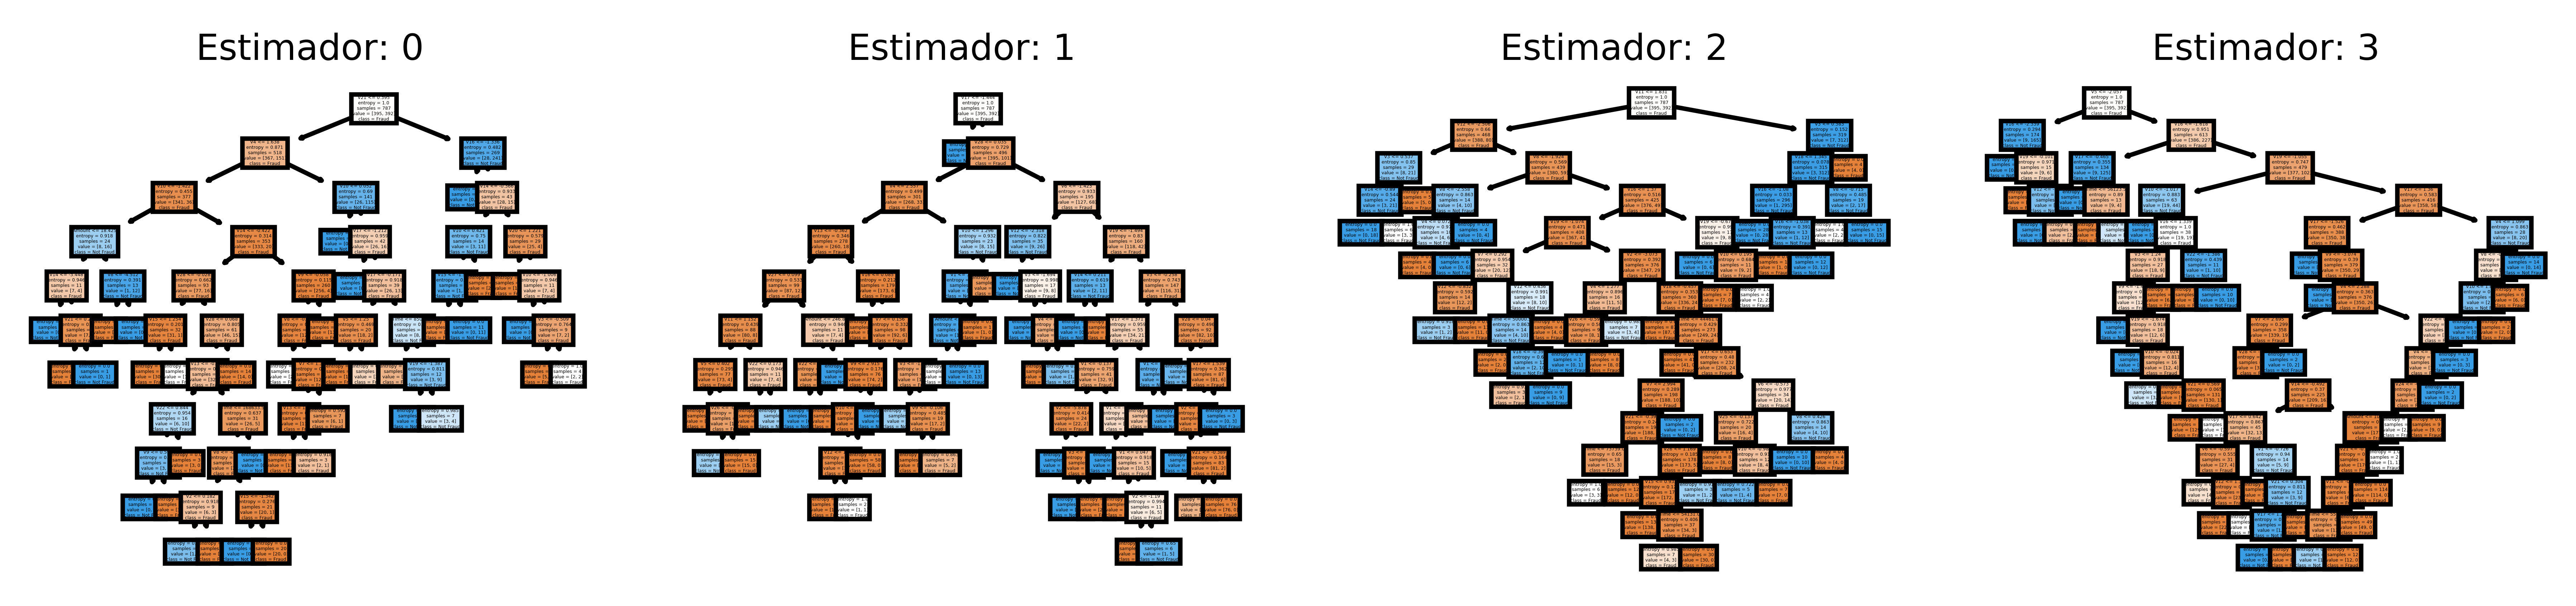

In [130]:
#Importando a função 'tree' do sklearn. Ela faz o trabalho de plotar a decision tree em si usando os parametros do nosso dataset.
from sklearn import tree

#Selecionando os nomes das features do dataset de treino em X e em y
fn=X_test.columns
cn=['Fraud', 'Not Fraud']

#Criando subplots para conseguirmos plotar as figuras em uma mesma imagem
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,2), dpi=900)

#Decidimos por mostrar apenas 4 decision trees já que o número e bem grande quando olhamos para o modelo por completo, assim, teriamos uma imagem muito distorcida.
#Passamos pelas 4 primeira decision trees (ou estimadores) e colocamos elas nos subplots
for index in range(0, 4):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    axes[index].set_title('Estimador: ' + str(index), fontsize = 8)

#Também salvamos a visualização em um arquivo png para, talvez, utilizarmos em outros locais com o intuito de ilustrar o modelo.
fig.savefig('trees.png')